In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
data = pd.read_csv('heartfailure.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
pd.set_option('display.max.rows', 299) 

In [4]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [5]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


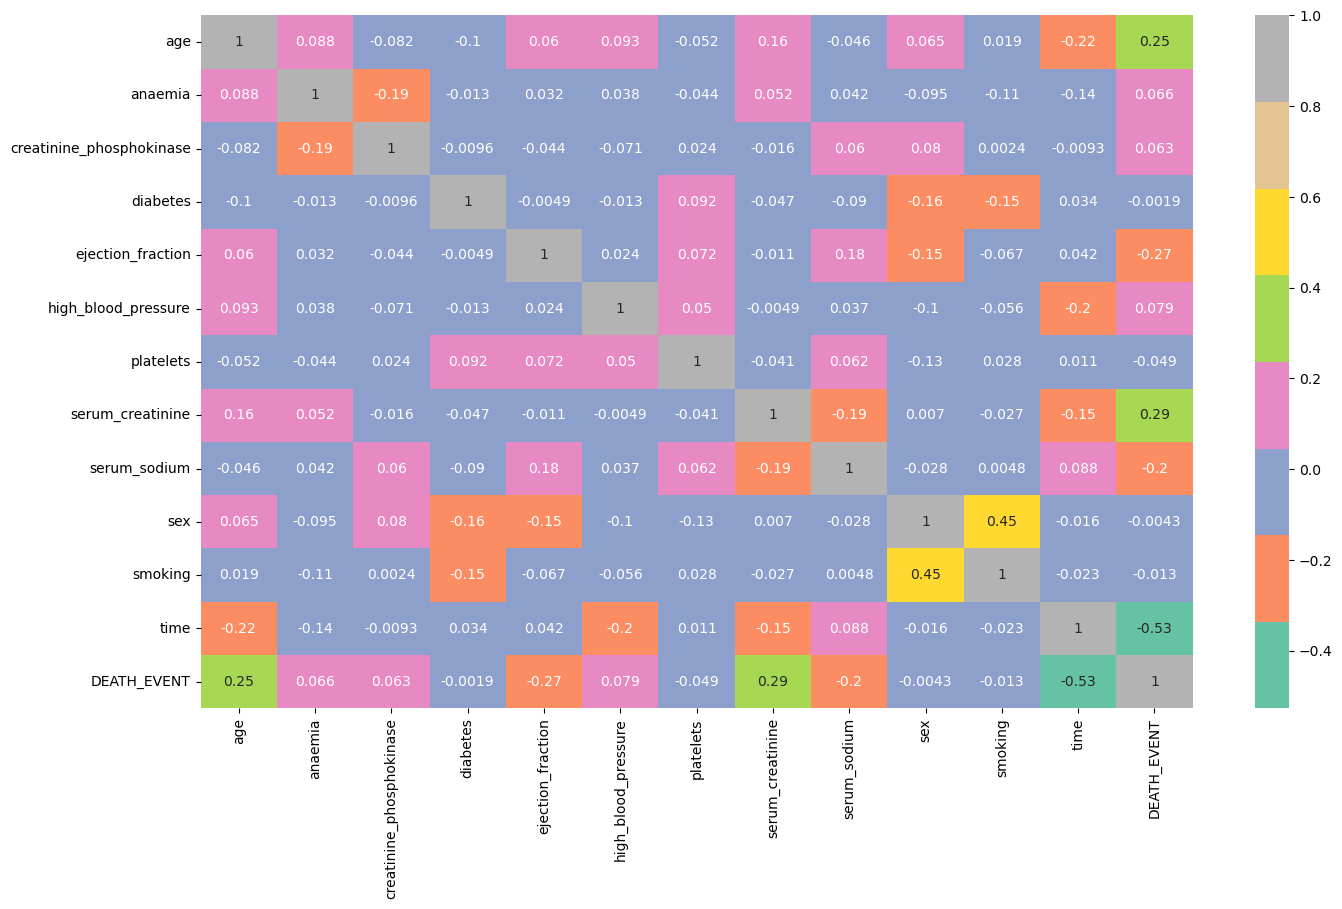

In [9]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [10]:
X = data.iloc[:,:12].values
Y = data.iloc[:,12:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)


In [11]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, max_iter=1000)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
print(prediction)

C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [12]:
test_data = data.iloc[100:101]
test_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
100,65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87,0


In [13]:
print("The accuracy score = ", round(model.score(X_train,Y_train)*100,2))

The accuracy score =  81.17


In [14]:
test_data = data.iloc[100:101]
output = test_data['DEATH_EVENT']
test_data.drop(['DEATH_EVENT'],axis = 1, inplace = True)
print("Predicted DEATH_EVENT",model.predict(test_data)[0])
print("Actual DEATH_EVENT", output.values[0])

Predicted DEATH_EVENT 0
Actual DEATH_EVENT 0


C:\Users\SU3ARNA\AppData\Local\Temp\ipykernel_23824\3085196310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['DEATH_EVENT'],axis = 1, inplace = True)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


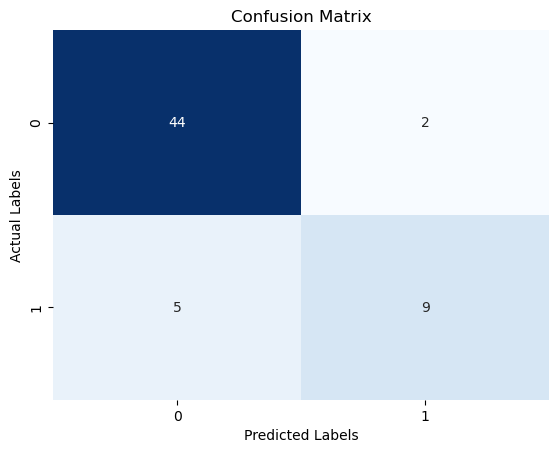

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.82      0.64      0.72        14

    accuracy                           0.88        60
   macro avg       0.86      0.80      0.82        60
weighted avg       0.88      0.88      0.88        60



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('heartfailure.csv')

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6833333333333333
Confusion Matrix:
[[34  1]
 [18  7]]


In [19]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :], iris.target

# Split the data into training and testing subsets
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

# Standardize the features
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)

# Predict outcomes on the testing data
y_pred = knn.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(con_mat)

# Calculate class-specific accuracy
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print("Class 0 accuracy:", class1_accuracy)
print("Class 1 accuracy:", class2_accuracy)
print("Geometric mean accuracy:", math.sqrt(class1_accuracy * class2_accuracy))


Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Class 0 accuracy: 1.0
Class 1 accuracy: 1.0
Geometric mean accuracy: 1.0
